## WeRateDogs Analysis

Here are some observations about the data for the WeRateDogs tweets based on the cleaned data.

Let's have a look at the data. Perhaps of interest is any connection between the ratings given and the number of retweets and favorites.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
dogs = pd.read_csv("twitter_archive_master.csv")

In [12]:
#taking out the 1776 and 420 (Snopp Dogg) outliers
grouped = dogs[dogs["rating_numerator"] <= 14][["rating_numerator", "favorite_count"]].groupby("rating_numerator")

name_box = []
rating_box = []

for name, group in grouped:
    name_box.append(name)
    rating_box.append(group["favorite_count"])

Let's look at how the ratings are distributed. We know the system is idiosyncratic, but let's see *how* idiosyncratic. Note we have removed the two highest ratings to make the chart legible.

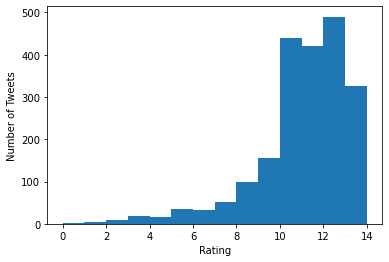

In [13]:
fig, ax = plt.subplots()
ax.hist(dogs[dogs["rating_numerator"] <= 14]["rating_numerator"], bins = 14);
ax.set_xlabel("Rating")
ax.set_ylabel("Number of Tweets");

Above the boxes are half open so the point where the chart increases from c 150 to c 450 is the 10 bar. The last bar includes bother 13 and 14. We can see that the vast majority of ratings are greater are 10 or greater. There is a tail of small ratings. This certainly doesn't look like the kind of rating distribution one might expect from someone committed to differentiating something on a scale of 0 to 10...

Now let's see whether there is any connection between the rating given to a dog and the favourite count.

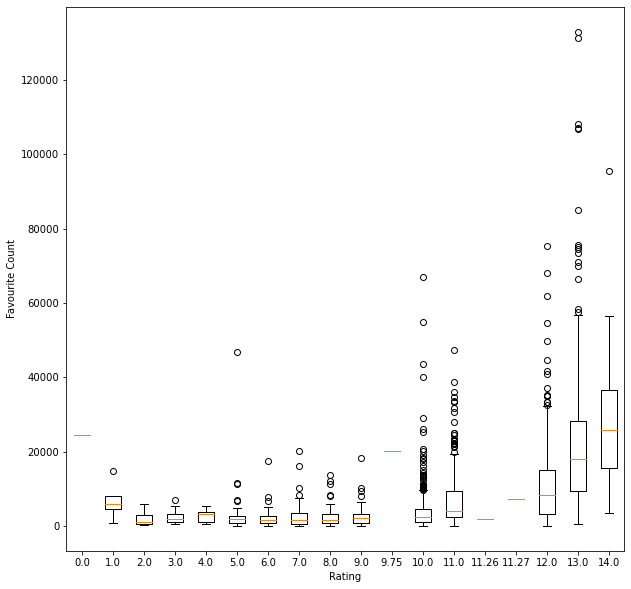

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
ax.boxplot(rating_box);
ax.set_xlabel("Rating")
ax.set_ylabel("Favourite Count")
ax.set_xticklabels(name_box);

The above box plots do seem to show a relationship between increasing scores and increasing favourite counts. The single orange lines are single point datasets so shouldn't be given much weight. Comfortably the highest mean favourite count is for the 14/10 ratings.

What about breeds? Are some more popular in terms of favourite count or rating (i.e. popular with both the account and the followers)? Let's restrict ourselves to those dogs with at least 20 pictures to try to avoid small sample outliers.

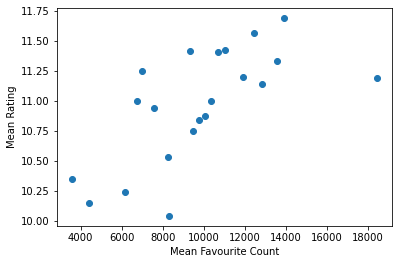

In [15]:
dogs_breed = dogs.groupby("breed")[["favorite_count", "rating_numerator"]].mean()
dogs_breed_20 = dogs_breed[(dogs.groupby("breed")["tweet_id"].count()) >= 20]
fig, ax = plt.subplots()
ax.scatter(dogs_breed_20["favorite_count"], dogs_breed_20["rating_numerator"])
ax.set_xlabel("Mean Favourite Count")
ax.set_ylabel("Mean Rating");

In [16]:
np.corrcoef(dogs_breed_20["favorite_count"], dogs_breed_20["rating_numerator"])

array([[1.        , 0.66582805],
       [0.66582805, 1.        ]])

We can see a clear trend here with, breed by breed, a 67% correlation between the mean rating and mean favourite count. There are many possible reasons for this of course. Perhaps followers look at ratings and are more likely to favourite the highly rated ones (particularly the unusually high 14 ratings), or perhaps both the account and the followers have the same taste in dogs. 

Finally, let's see which are the most popular breeds in the chart above by sorting by mean favourite count.

In [17]:
dogs_breed_temp = dogs.groupby("breed")[["favorite_count"]].describe()
dogs_breed_temp = dogs_breed_temp[(dogs.groupby("breed")["tweet_id"].count()) >= 20]
dogs_breed_temp.sort_values(by=("favorite_count", "mean"), ascending=False)

favorite_count                                     \
                                   count          mean           std    min   
breed                                                                         
French Bulldog                      31.0  18416.806452  21736.621477  341.0   
Samoyed                             42.0  13902.523810  14551.126828  806.0   
Cocker Spaniel                      30.0  13580.400000  17017.670683  300.0   
Cardigan                            21.0  12840.190476  11375.119527  525.0   
Golden Retriever                   156.0  12460.141026  12747.136209  198.0   
Labrador Retriever                 106.0  11937.311321  16764.307131  318.0   
Pembroke                            94.0  11051.031915  11800.307922  171.0   
Eskimo Dog                          22.0  10686.545455  16335.656993  550.0   
German Shepherd                     21.0  10355.666667   9108.792128  128.0   
Malamute                            33.0  10086.636364  14093.315095  229.0   
Chesapeake Bay Retriever            31.0   9749.870968  14015.356225  170.0   
Staffordshire Bullterrier           20.0   9488.500000   9980.939648  436.0   
Chow                                48.0   9311.104167  10499.221818  448.0   
Miniature Pinscher                  24.0   8295.000000   9831.634625  111.0   
Chihuahua                           90.0   8263.211111  14243.348761  131.0   
Pomeranian                          41.0   7592.780488  10944.935051  400.0   
Siberian Husky                      20.0   6999.100000   6634.152640  658.0   
Toy Poodle                          50.0   6745.400000   8597.908889  262.0   
Pug                                 62.0   6190.596774   8715.079916  121.0   
Beagle                              20.0   4407.950000   3911.873471  352.0   
Shih-Tzu                            20.0   3593.350000   4744.704930  265.0   

                                                                
                               25%     50%       75%       max  
breed                                                           
French Bulldog             3572.50  9997.0  27120.50  106827.0  
Samoyed                    2826.50  7469.5  20888.75   54720.0  
Cocker Spaniel             3201.75  9332.0  16027.25   75639.0  
Cardigan                   4531.00  8564.0  18423.00   37744.0  
Golden Retriever           3600.50  8689.0  16578.75   85011.0  
Labrador Retriever         2290.00  6227.0  16341.75  131075.0  
Pembroke                   3122.50  6554.0  15022.50   69871.0  
Eskimo Dog                 1864.50  3281.0  15324.00   75163.0  
German Shepherd            6340.00  7592.0  14376.00   37198.0  
Malamute                   3015.00  6236.0  11065.00   75193.0  
Chesapeake Bay Retriever   2074.50  4026.0  10744.00   71144.0  
Staffordshire Bullterrier  2659.50  4307.5  15075.00   38074.0  
Chow                       3830.50  7005.0   9827.75   66437.0  
Miniature Pinscher         1764.00  3783.0  10240.75   34948.0  
Chihuahua                  1227.00  2947.0   9811.75  107015.0  
Pomeranian                 2011.00  3134.0   7110.00   56848.0  
Siberian Husky             2512.00  3636.0   9843.25   22185.0  
Toy Poodle                 1457.50  4267.0   8687.25   49720.0  
Pug                        1684.00  2639.0   5822.25   36689.0  
Beagle                     1112.25  3626.0   6107.00   14265.0  
Shih-Tzu                   1298.50  2716.5   3354.75   22073.0

The most favourited breed is the French Bulldog and the least favourited is the Shih-Tzu. The 25% quartile for the French Bulldog is above the 75% for teh Shih-Tzu.